# TOPIC 4:Fraud Detection_1
# KNN CLASSIFIER
In this project, we will use data set sourced by ULB machine learning group and provided by Kaggle to build and implement a KNN classifier that will classify with high accuracy credit card transactions as non-fraud or fraudulent transactions.<br>
The data set can be found here https://www.kaggle.com/mlg-ulb/creditcardfraud<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(10,5)})

In [3]:
#To display all columns name
pd.options.display.max_columns = None
#pd.options.display.max_columns = 10

In [4]:
credit_card_back_up = pd.read_csv(r"D:\DataBases\DataSets\creditcard.csv")
df_shape = (credit_card_back_up.shape)
credit_card = credit_card_back_up.copy()
print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset")
credit_card.head()

There are 284807 rows and 31 columns in the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [130]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
corr_df = corr = credit_card.corr(method='pearson')

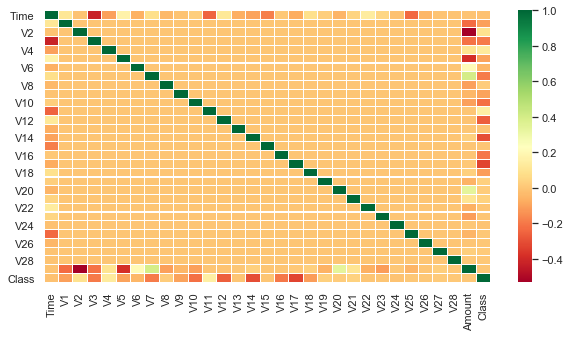

In [13]:
sns.heatmap(corr_df,
           annot=False,
           cbar=True,
           cmap="RdYlGn",
           linewidths=0.10,
           fmt="");

In [16]:
print(credit_card["Class"].value_counts())

0    284315
1       492
Name: Class, dtype: int64


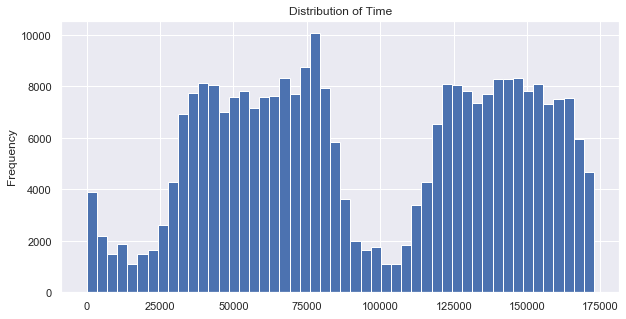

In [91]:
credit_card["Time"].plot(bins=50, kind='hist')
plt.title("Distribution of Time");

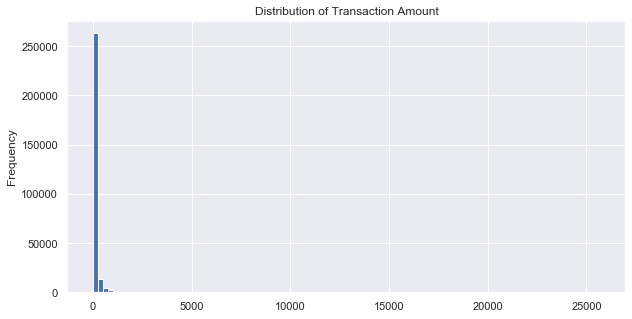

In [92]:
credit_card["Amount"].plot(bins=100, kind='hist')
plt.title("Distribution of Transaction Amount");

In [93]:
print("Distribution of the classes in the target")
print(credit_card["Class"].value_counts()/len(credit_card))

Distribution of the classes in the target
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [21]:
#We have to scale the features Time and Amount
from sklearn.preprocessing import StandardScaler, RobustScaler

In [95]:
std_scaler = StandardScaler()

std_scaler.fit(credit_card.drop("Class", axis=1))
scaled_features = std_scaler.transform(credit_card.drop("Class", axis=1))

In [96]:
scaled_features.shape

(284807, 30)

In [23]:
df_scaled = pd.DataFrame(scaled_features, columns= credit_card.columns[:-1])

# 1. WITH UNBALANCED DATA

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [98]:
#We divide our data set into 70% training set and 30% test set
X= scaled_features
y=credit_card["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [100]:
#K_param = [1,3,5,7,9,11,13]
K_param = np.arange(1,7,2)

# Define a list in which we write the accuracies
acc_test_K = []

print("\nAccuracy on test data: \n")
for K in K_param:    
    knn = KNeighborsClassifier(n_neighbors=K,p=2)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    correct_pred = y_pred == y_test
    
    num_correct_pred = np.sum(1.0*correct_pred)
    accuracy_test = 100*num_correct_pred /len(y_test)
    
    acc_test_K.append(accuracy_test)
    #acc_train_K.append(accuracy_train)
    print("For K = {}, {} correct prediction out of {} test samples. Accuracy: {:0.2f}".format(K,num_correct_pred,len(y_test),accuracy_test))
    print()   


Accuracy on test data: 

For K = 1, 85397.0 correct prediction out of 85443 test samples. Accuracy: 99.95

For K = 3, 85407.0 correct prediction out of 85443 test samples. Accuracy: 99.96

For K = 5, 85403.0 correct prediction out of 85443 test samples. Accuracy: 99.95



In [102]:
from sklearn.metrics import classification_report,confusion_matrix
# NOW WITH K=3
#Instantiate the Model
knn = KNeighborsClassifier(n_neighbors=3, p = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=3


[[85300     5]
 [   31   107]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.96      0.78      0.86       138

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [103]:
correct_pred = (y_test == y_pred).sum()
print("target predicted correctly", correct_pred)
wrong_pred = X_test.shape[0] - correct_pred 
print("target predicted incorrectly", wrong_pred)

#Accuracy
correct_pred/len(X_test)

#Fraction wrong
frac_wrong = wrong_pred/len(X_test)
print("fraction predicted incorectly is {:.2%}".format(frac_wrong))
print("the accuracy of the model is {:.2%}".format(1-frac_wrong))

np.unique(y_pred, return_counts=True)

#True positive
#observed= True(positive), predicted = true(positive)
true_pos = (y_test==1) & (y_pred==1)
true_pos.sum()
true_pos

#False positive: type error 1
#observed= False(negative), predicted= True(positive)
false_pos = (y_test==0) & (y_pred==1)
false_pos.sum()

#False Negative: Type error 2
#observed= true(positive), predicted= false(negative)
false_neg = (y_test==1) & (y_pred==0)
false_neg.sum()

#True Negative
#observed= False, predicted False
true_neg = (y_test==0)

#Recall score the lower the false_neg the higher the recall_score if false_neg = o, recall = 1
#how many target the model predicted right considereing the number of target present 
recall_score = true_pos.sum()/(true_pos.sum()+false_neg.sum())
print("recall score of the model is {:.2%}".format(recall_score))

#Precison
#inverse relation between precision and recall
precision_score = true_pos.sum()/(true_pos.sum()+false_pos.sum())
print("precision score of the model is {:.2%}".format(precision_score))

F1_score = 2*((precision_score*recall_score)/(precision_score+recall_score))
print("F1 score of the model is {:.2%}".format(F1_score))

target predicted correctly 85407
target predicted incorrectly 36
fraction predicted incorectly is 0.04%
the accuracy of the model is 99.96%
recall score of the model is 77.54%
precision score of the model is 95.54%
F1 score of the model is 85.60%


**To plot the confusion matrice**

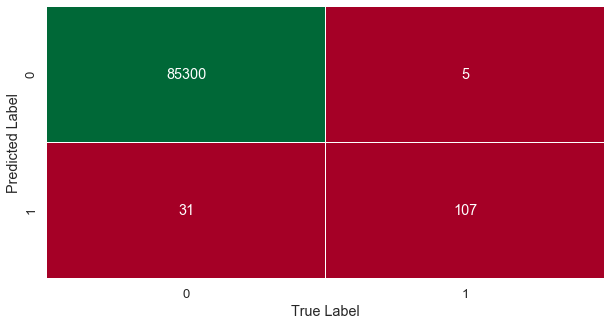

In [104]:
#Visualize cm with seaborn
sns.set(font_scale=1.2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
           annot=True,
           cbar=False,
           cmap="RdYlGn",
           linewidths=0.30,
           fmt="");
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

**To plot the Area Under the curve**


 ROC_AUC_CURVE


 ROC AUC SCORE: 0.89




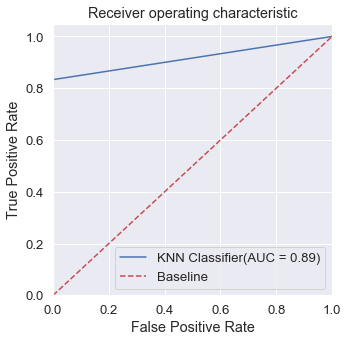

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('\n ROC_AUC_CURVE\n')
knn_roc_auc = roc_auc_score(y_test, y_pred)
print('\n ROC AUC SCORE: %0.2f' % knn_roc_auc)
print('\n')
y_prob = knn.predict_proba(X_test)
#only positive(correct) predictions
y_prob_positive = y_prob[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='KNN Classifier(AUC = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label="Baseline")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
print('\n ROC_AUC_CURVE\n')
roc_auc = roc_auc_score(y_test, y_pred)
print('\n ROC AUC SCORE: %0.2f' % roc_auc)
print('\n')
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='KNN Classifier (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--',label="Baseline")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(fpr, tpr)

# 2.0 WITH BALANCED DATA 

In [18]:
unbalanced_df = credit_card
unbalanced_df = unbalanced_df.sample(frac=1)

fraud = unbalanced_df.loc[unbalanced_df["Class"]==1]
non_fraud = unbalanced_df.loc[unbalanced_df["Class"]==0][:492]
balanced_df = pd.concat([fraud, non_fraud])

shuffled_df = balanced_df.sample(frac=1, random_state=88)

print("Distribution of the classes in the subsample dataset")
print(shuffled_df["Class"].value_counts()/len(shuffled_df))

Distribution of the classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


In [22]:
std_scaler = StandardScaler()

std_scaler.fit(shuffled_df.drop("Class", axis=1))
bal_scaled_features = std_scaler.transform(shuffled_df.drop("Class", axis=1))

In [24]:
X= bal_scaled_features
y= shuffled_df["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [25]:
print(X_train.shape)
print(y_train.shape)

(688, 30)
(688,)


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
#We define a function to calculate accuracy metrics
def evaluate_preds(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metric_dict = {"accuracy":round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F-1: {f1:.2f}")
    
    return metric_dict

**We used RandomizedSearchCV to search for optimal parameters**

In [36]:
#from sklearn.model_selection import RandomizedSearchCV
#We create a dictinnay containing the parameters we would like to adjust as the keys and then the values 
#we would like to try as the values of the dict
K = np.arange(1,15,2)
grid={"n_neighbors":K,
      "weights":["uniform", "distance"],
      "metric":["minkowski", "euclidean", "manhattan","chebyshev"],
      "p":[1, 2]}
#...
clf= KNeighborsClassifier()
#rsCV
rscv_knn_clf = RandomizedSearchCV(estimator=clf,
                             param_distributions=grid,
                             n_iter=20,#number of model to try
                             cv=5,
                             verbose=2)
#fit the RandomizedSearchCv version of clf
rscv_knn_clf.fit(X_train, y_train)
#Make prediction with the best hyperparameters
rscv_knn_y_pred = rscv_knn_clf.predict(X_test)
#We evaluate the prediction
rscv_knn_metrics = evaluate_preds(y_test, rscv_knn_y_pred)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weights=distance, p=1, n_neighbors=5, metric=manhattan ..........
[CV]  weights=distance, p=1, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, p=1, n_neighbors=5, metric=manhattan ..........
[CV]  weights=distance, p=1, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, p=1, n_neighbors=5, metric=manhattan ..........
[CV]  weights=distance, p=1, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, p=1, n_neighbors=5, metric=manhattan ..........
[CV]  weights=distance, p=1, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, p=1, n_neighbors=5, metric=manhattan ..........
[CV]  weights=distance, p=1, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, p=2, n_neighbors=9, metric=manhattan ..........
[CV]  weights=distance, p=2, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=distance, p=2, n_neighbors=9, metric=manhat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=5, metric=minkowski, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=5, metric=minkowski ...........
[CV]  weights=uniform, p=1, n_neighbors=5, metric=minkowski, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=3, metric=euclidean ...........
[CV]  weights=uniform, p=1, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=3, metric=euclidean ...........
[CV]  weights=uniform, p=1, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=3, metric=euclidean ...........
[CV]  weights=uniform, p=1, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=3, metric=euclidean ...........
[CV]  weights=uniform, p=1, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=3, metric=euclidean ...........
[CV]  weights=uniform, p=1, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, p=1, n_neighbors=13, metri

[CV]  weights=uniform, p=1, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=13, metric=manhattan ..........
[CV]  weights=uniform, p=1, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=13, metric=manhattan ..........
[CV]  weights=uniform, p=1, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=7, metric=minkowski ...........
[CV]  weights=uniform, p=2, n_neighbors=7, metric=minkowski, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=7, metric=minkowski ...........
[CV]  weights=uniform, p=2, n_neighbors=7, metric=minkowski, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=7, metric=minkowski ...........
[CV]  weights=uniform, p=2, n_neighbors=7, metric=minkowski, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=7, metric=minkowski ...........
[CV]  weights=uniform, p=2, n_neighbors=7, metric=minkowski, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=7, metr

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [37]:
#call the estimator with the best result 
rscv_knn_clf.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'manhattan'}

**We used GridSearchCV to tune the optimal parameters obtained from RandomizedSearchCV**

In [38]:
#We take the best parameters previously obtained
#grid2 = best parameters grid 1
K = np.arange(5,10,1)
grid_2 ={"n_neighbors":K,
      "weights":["distance"],
      "metric":["manhattan"],
      "p":[1]}
#...
clf= KNeighborsClassifier()
#rsCV
gscv_knn_clf = GridSearchCV(estimator=clf,
                             param_grid=grid_2,
                             cv=5,
                             verbose=2)
#fit the RandomizedSearchCv version of clf
gscv_knn_clf.fit(X_train, y_train)
#Make prediction with the best hyperparameters
gscv_knn_y_pred = gscv_knn_clf.predict(X_test)
#We evaluate the prediction
gscv_knn_metrics = evaluate_preds(y_test, gscv_knn_y_pred)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] metric=manhattan, n_neighbors=5, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=6, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, p=1, weights=distanc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=manhattan, n_neighbors=9, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=9, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=9, p=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, p=1, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=9, p=1, weights=distance, total=   0.0s
Accuracy: 91.89%
Precision: 0.99
Recall: 0.85
F-1: 0.92


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


In [39]:
#call the estimator with the best result 
gscv_knn_clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [40]:
#Instantiate the model
knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=5, p=1, weights= 'distance')
#We fit the model to the traning set 
knn_clf.fit(X_train, y_train)
#We test the model on the test set
y_pred = knn_clf.predict(X_test)

In [41]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[140   1]
 [ 23 132]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       141
           1       0.99      0.85      0.92       155

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



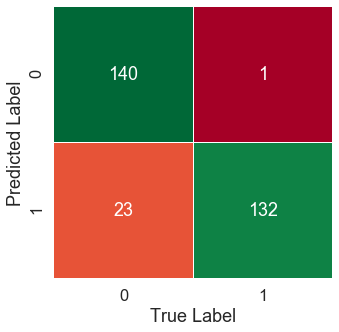

In [43]:
sns.set(rc={'figure.figsize':(5,5)})
#Visualize cm with seaborn
import seaborn as sns
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
           annot=True,
           cbar=False,
           cmap="RdYlGn",
           linewidths=0.30,
           fmt="");
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

In [44]:
correct_pred = (y_test == y_pred).sum()
print("target predicted correctly", correct_pred)
wrong_pred = X_test.shape[0] - correct_pred 
print("target predicted incorrectly", wrong_pred)

#Accuracy
correct_pred/len(X_test)

#Fraction wrong
frac_wrong = wrong_pred/len(X_test)
print("fraction predicted incorectly is {:.2%}".format(frac_wrong))
print("the accuracy of the model is {:.2%}".format(1-frac_wrong))

np.unique(y_pred, return_counts=True)

#True positive
#observed= True(positive), predicted = true(positive)
true_pos = (y_test==1) & (y_pred==1)
true_pos.sum()
true_pos

#False positive: type error 1
#observed= False(negative), predicted= True(positive)
false_pos = (y_test==0) & (y_pred==1)
false_pos.sum()

#False Negative: Type error 2
#observed= true(positive), predicted= false(negative)
false_neg = (y_test==1) & (y_pred==0)
false_neg.sum()

#True Negative
#observed= False, predicted False
true_neg = (y_test==0)

#Recall score the lower the false_neg the higher the recall_score if false_neg = o, recall = 1
#how many target the model predicted right considereing the number of target present 
recall_score = true_pos.sum()/(true_pos.sum()+false_neg.sum())
print("recall score of the model is {:.2%}".format(recall_score))

#Precison
#inverse relation between precision and recall
precision_score = true_pos.sum()/(true_pos.sum()+false_pos.sum())
print("precision score of the model is {:.2%}".format(precision_score))

F1_score = 2*((precision_score*recall_score)/(precision_score+recall_score))
print("F1 score of the model is {:.2%}".format(F1_score))

target predicted correctly 272
target predicted incorrectly 24
fraction predicted incorectly is 8.11%
the accuracy of the model is 91.89%
recall score of the model is 85.16%
precision score of the model is 99.25%
F1 score of the model is 91.67%



 ROC_AUC_CURVE


 ROC AUC SCORE: 0.93




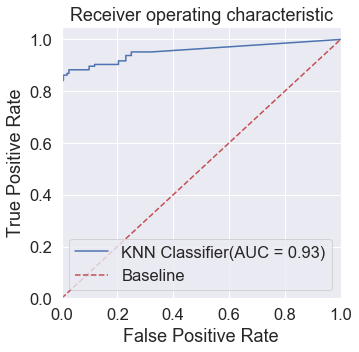

In [126]:
print('\n ROC_AUC_CURVE\n')
knn_roc_auc = roc_auc_score(y_test, y_pred)
print('\n ROC AUC SCORE: %0.2f' % knn_roc_auc)
print('\n')
y_prob = knn_clf.predict_proba(X_test)
#only positive(correct) predictions
y_prob_positive = y_prob[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='KNN Classifier(AUC = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label="Baseline")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

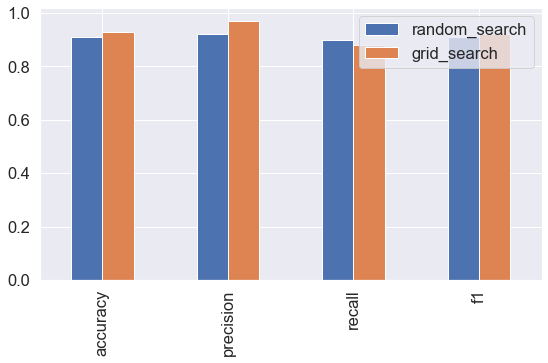

In [128]:
#Compare the models
all_metrics = pd.DataFrame({"random_search":rscv_knn_metrics,
                           "grid_search":gscv_knn_metrics})
all_metrics.plot.bar(figsize=(9, 5));